In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
sns.set()

In [6]:
df = pd.read_csv("C:\\Users\\siying\\Desktop\\School\\422-DL Practical Machine Learning\\week 1\\train.csv")


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df_drop = df.dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
sns.pairplot(df_drop, hue='Survived')

In [34]:
df_drop.groupby('Survived').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,60.0,41.350000,15.739484,2.00,29.75,44.5,52.5,71.0
1,123.0,32.905854,14.890113,0.92,23.00,33.0,42.0,80.0


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

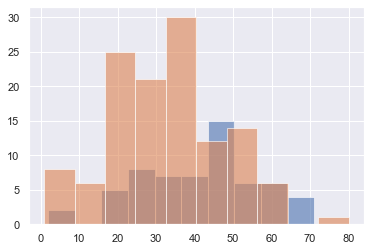

In [35]:
df_drop.groupby('Survived').Age.hist(alpha=0.6)

C:\Users\siying\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


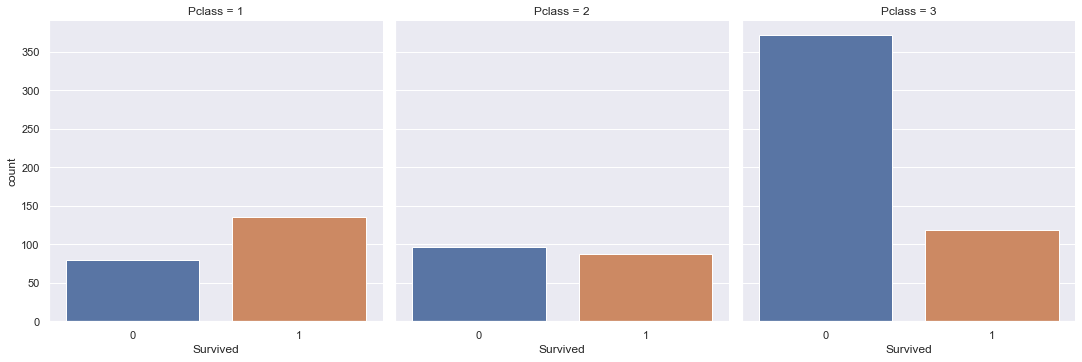

In [18]:
#Survival by Class
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df)

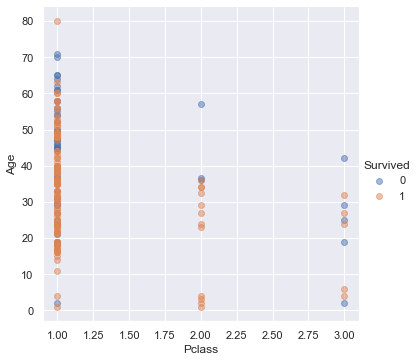

In [39]:
sns.lmplot(x='Pclass', y='Age',hue='Survived', data=df_drop, fit_reg=False, scatter_kws={'alpha':0.5})

C:\Users\siying\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


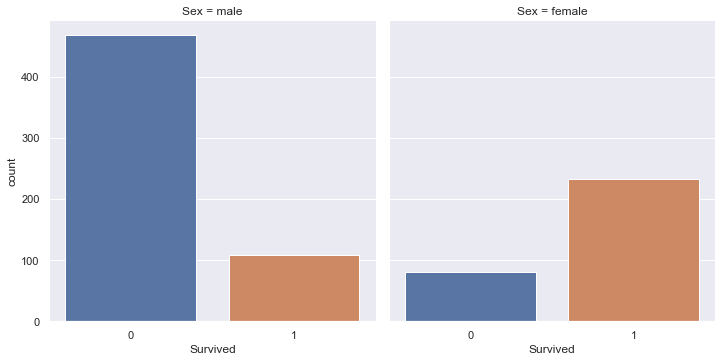

In [15]:
#Survival by Sex
sns.factorplot(x='Survived', col='Sex', kind='count', data=df)

In [16]:
df_drop.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [40]:
fig = plt.figure(figsize=(20,5), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.5

#Survival Distribution
ax1 = plt.subplot2grid((2,3),(0,0))
             
df_drop.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

ax1.set_xlim(-1, 2)

plt.title("Survival Distribution, (1 = Survived)")    

#Survival by Age
plt.subplot2grid((2,3),(0,1))
plt.scatter(df_drop.Survived, df_drop.Age, alpha=alpha_scatterplot)

plt.ylabel("Age")
                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

#Class Distribution
ax3 = plt.subplot2grid((2,3),(0,2))
df_drop.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df_drop.Pclass.value_counts()))
plt.title("Class Distribution")

#Age Distribution by Class
plt.subplot2grid((2,3),(1,0), colspan=2)

df_drop.Age[df_drop.Pclass == 1].plot(kind='kde')    
df_drop.Age[df_drop.Pclass == 2].plot(kind='kde')
df_drop.Age[df_drop.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution by Class")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
